# Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# Importing Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Ignoring Warnings

import warnings
warnings.filterwarnings('ignore')

### Step 1: Readng and Understanding Data

In [2]:
# Read the data from csv file
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the column Description
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# check the Shape of Data frame
bike_df.shape

(730, 16)

In [5]:
# Check for any nulls in dataframe
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# check for data with in each cells
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Preparing Data

In [7]:
# renaming some of Columns for better understanding

bike_df.rename(columns = {'dteday': 'date', 'atemp': 'temp_feel_like', 'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt': 'count'}, inplace=True)
bike_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_df_copy = bike_df.copy()

In [9]:
# remove duplicates
bike_df_copy.drop_duplicates(subset=None, inplace = True)
bike_df_copy.shape

(730, 16)

#### No Duplicates found in Provided data sets

In [10]:
# Remove Columns which are not required
bike_df_copy.drop(['instant','date','casual','registered'],axis=1,inplace=True)

In [11]:
bike_df_copy.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    int64  
 1   year            730 non-null    int64  
 2   month           730 non-null    int64  
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    int64  
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    int64  
 7   temp            730 non-null    float64
 8   temp_feel_like  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [13]:
bike_df_copy.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Analysing & Visualizing the Data

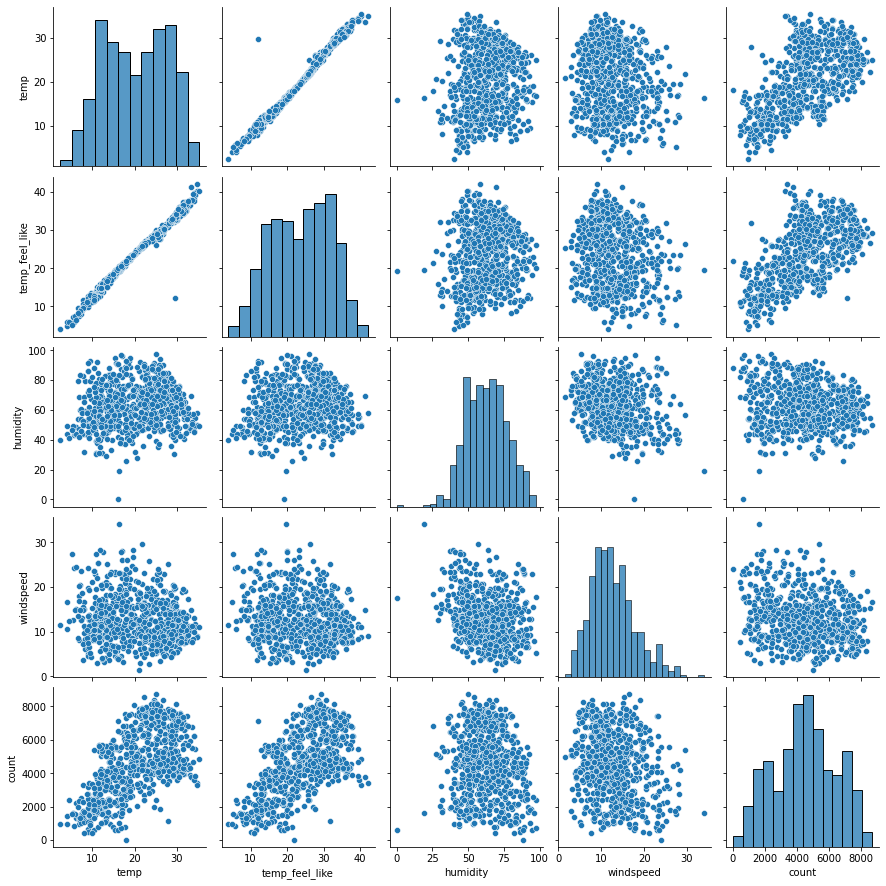

In [14]:
# Scatter Plot to Analyze Numerical data
sns.pairplot(data = bike_df_copy, vars = ['temp', 'temp_feel_like', 'humidity', 'windspeed', 'count'])
plt.show()

It can be observed that there is linear relationship between
- Temp vs temp_feel_like
- temp vs count
- temp_feel_like vs count

## Step 4.1: Encoding/Mapping the Categorical Columns

In [15]:
bike_df_copy.season = bike_df_copy.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
bike_df_copy.month = bike_df_copy.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
bike_df_copy.weekday = bike_df_copy.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
bike_df_copy.weathersit = bike_df_copy.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
bike_df_copy.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


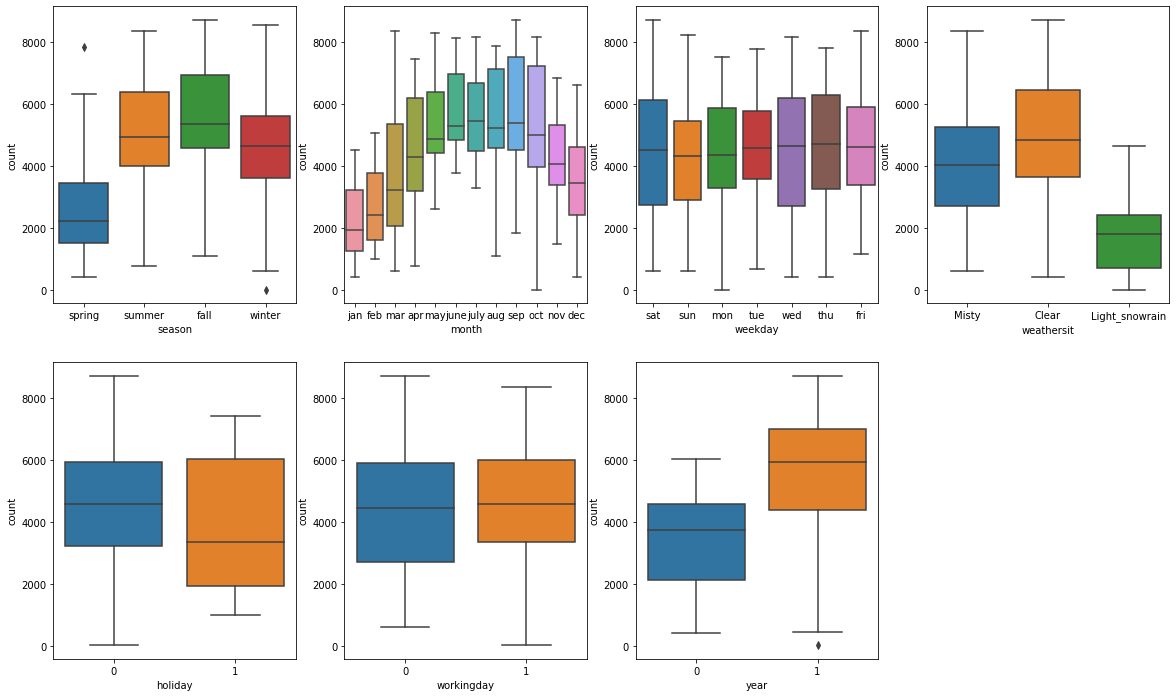

In [20]:
#Box Plot for Categorical data
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = bike_df_copy)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = bike_df_copy)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = bike_df_copy)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_df_copy)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = bike_df_copy)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_df_copy)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = bike_df_copy)
plt.show()

There were 7 categorical variables in the dataset.

Above Graph shows data between Categorical Data vs Counts

Points to Comsider:

Season: Maximum Bookings happened on Summer and Fall which grdually start decreasing from Winter to Sprint

Month: the lowest booking happens in JAN which starts increases to max in July and Sept

weekday: there is no significane changes can be observed across the week days.

weathersit: Most of the bookings happen in Misty and Clear weather

holiday: on holidays the bookings were not like as expected

workingday: Close to 5000 booking happened on working day. This indicates, workingday can be a good predictor for the dependent variable

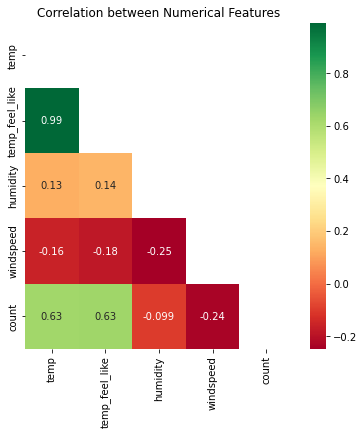

In [21]:
# Check for co-relation between the Numerical Features
plt.figure(figsize = (6,6))
matrix = np.triu(bike_df_copy[['temp','temp_feel_like','humidity','windspeed','count']].corr())
sns.heatmap(bike_df_copy[['temp','temp_feel_like','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Features")
plt.show()

Corelation value between temp and temp_feel_like is high. Both of the parameters cannot be used in the model due to multicolinearity.

## Step 4.2: Creating Dummy Variables

In [22]:
# Creating Dummy Variable and splitting it to Train and Test
months_df = pd.get_dummies(bike_df_copy.month, drop_first = True)
weekdays_df = pd.get_dummies(bike_df_copy.weekday, drop_first = True)
weathersit_df = pd.get_dummies(bike_df_copy.weathersit, drop_first = True)
seasons_df = pd.get_dummies(bike_df_copy.season, drop_first = True)

In [23]:
bike_df_copy.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
bike_df_new = pd.concat([bike_df_copy,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [25]:
bike_df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [26]:
bike_df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [27]:
# Splitting data in to 70:30 Ration
np.random.seed(0)
df_train, df_test = train_test_split(bike_df_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.shape

(219, 30)

## Step 5: ReScaling

In [30]:
# Rescaling the features except binary and dummy
scaler = MinMaxScaler()
num_vars = ['temp','temp_feel_like','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [31]:
df_train.describe()

,year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


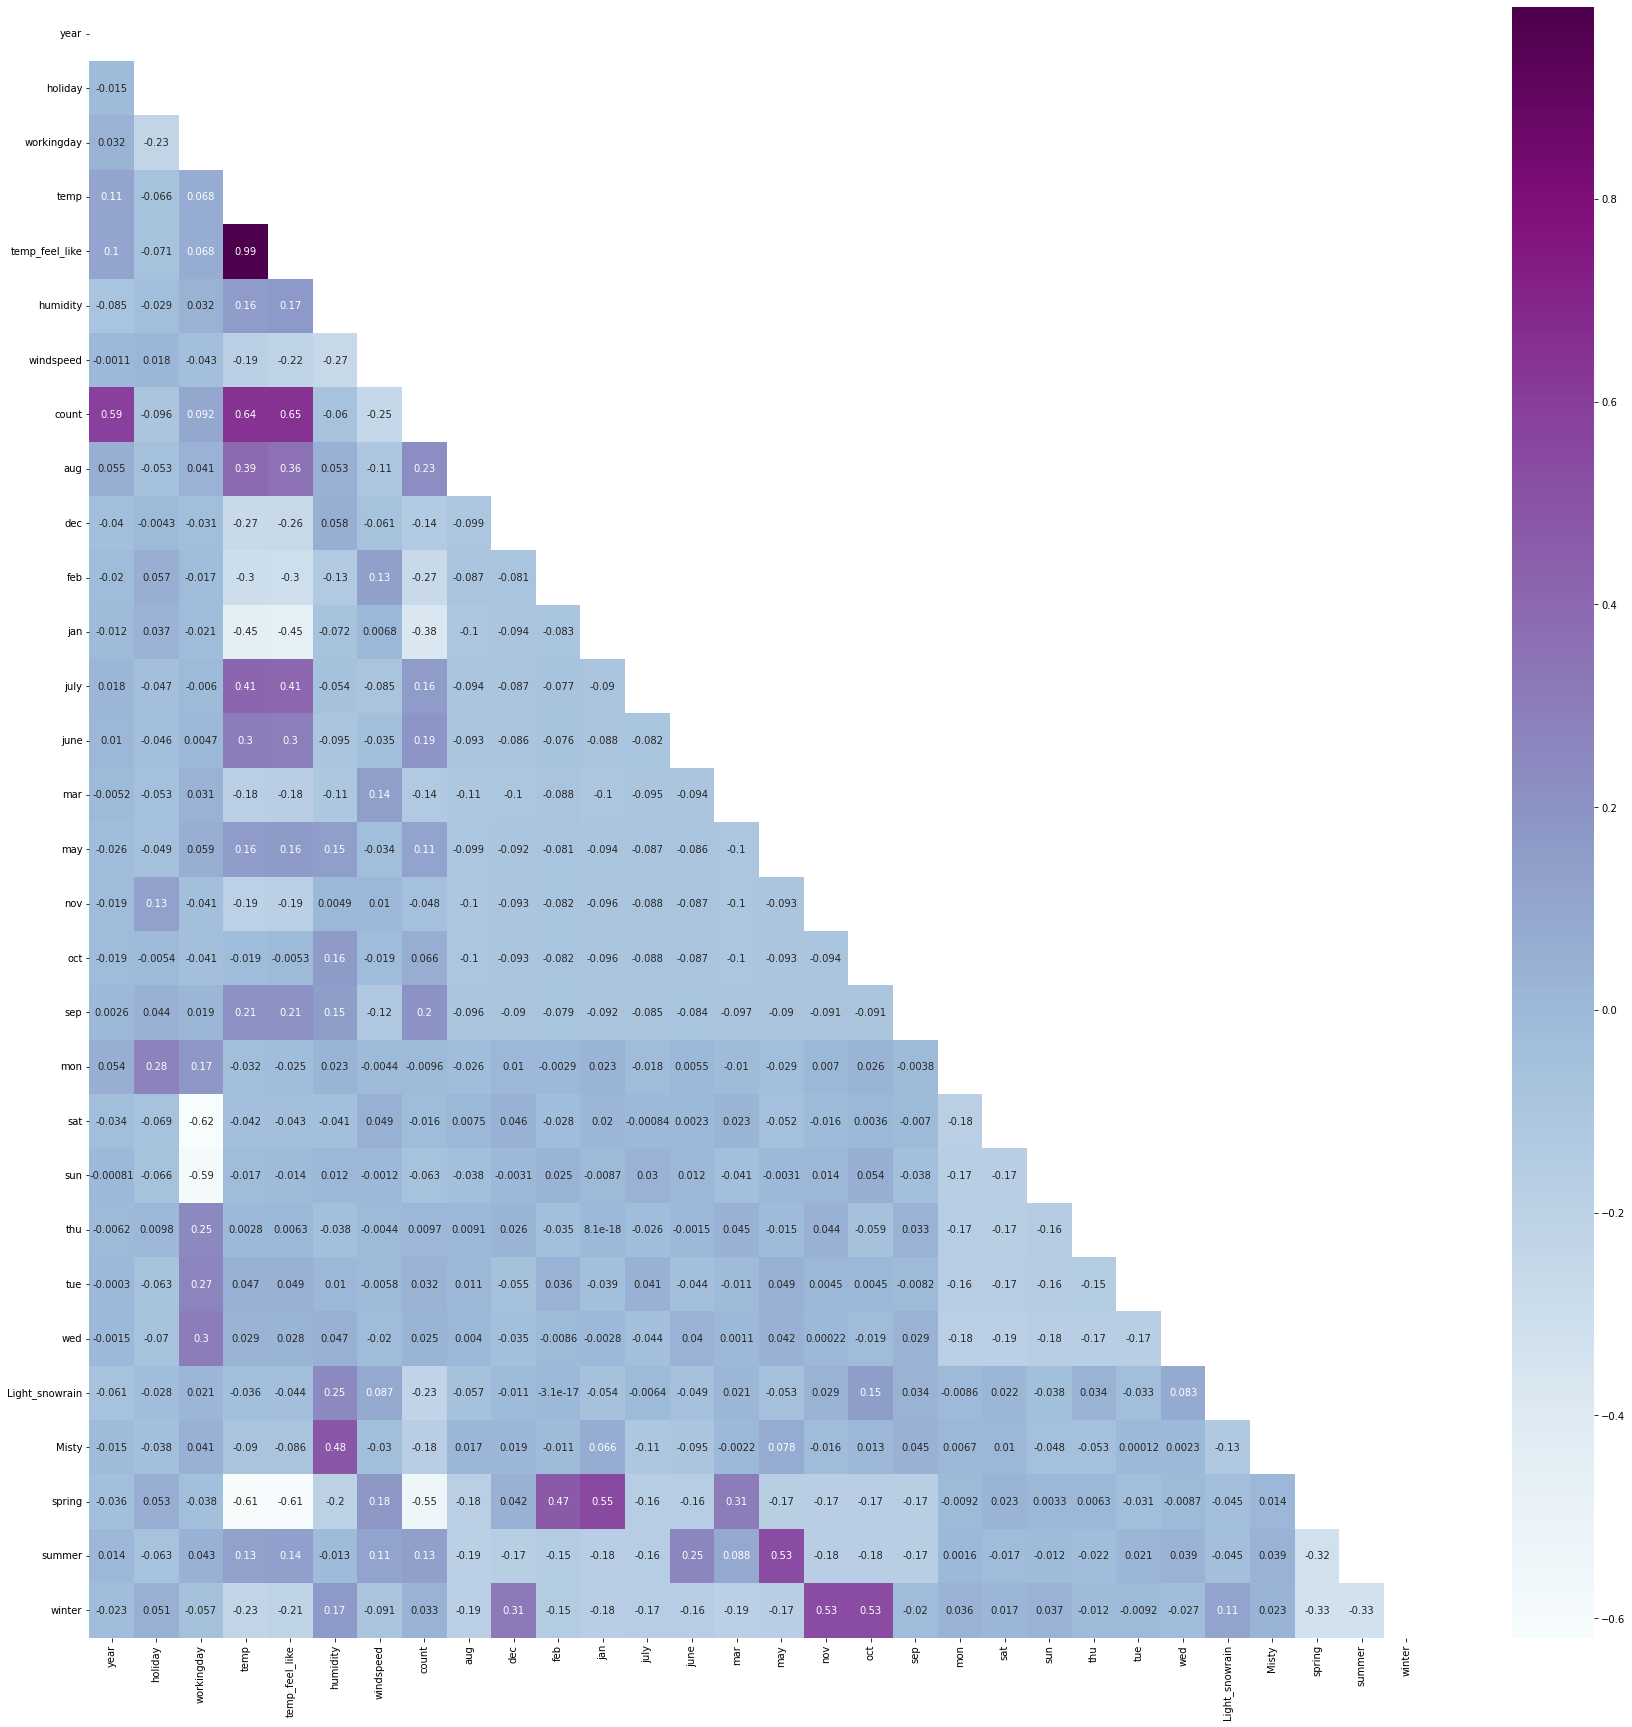

In [32]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,30))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="BuPu", mask=matrix)
plt.show()

Count correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

## Step 6: Preparing Linear Model

In [33]:
y_train = df_train.pop('count')
X_train = df_train

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('temp_feel_like', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 5),
 ('dec', False, 9),
 ('feb', False, 15),
 ('jan', False, 14),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 3),
 ('may', False, 4),
 ('nov', False, 10),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 6),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [36]:
# checking which features are considered via RFE
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')

In [37]:
# checking which features are rejected
X_train.columns[~rfe.support_]

Index(['temp_feel_like', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [38]:
# To calculate VIF of variables
def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
calVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.61
4,humidity,1.91
11,Misty,1.57


## Step 6.1: Buiding Linear Model

In [41]:
# 1st Linear Model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        14:35:25   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

In [42]:
# workingday and humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
3,humidity,28.28
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.37
12,summer,2.78
10,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [43]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        14:35:25   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2826      0.034      8.

In [44]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
11,summer,2.23
10,spring,2.13
0,year,2.07
12,winter,1.84
4,july,1.59
9,Misty,1.55
5,sep,1.34
6,sat,1.23


In [45]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          5.73e-189
Time:                        14:35:26   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2039      0.029      6.

In [46]:
# p-value for sat is high so dropping it
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.22
9,spring,2.11
0,year,2.07
11,winter,1.82
4,july,1.59
8,Misty,1.55
5,sep,1.34
6,sun,1.18


In [47]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          6.45e-190
Time:                        14:35:26   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2063      0.029      7.

In [48]:
# p-value for july is high so dropping it
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.90
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


In [49]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          1.51e-189
Time:                        14:35:26   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1983      0.029      6.

In [50]:
# p-value for july is high so dropping it
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
8,summer,1.56
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.16
6,Light_snowrain,1.08
1,holiday,1.04


In [51]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          2.88e-189
Time:                        14:35:26   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1350      0.017      8.

for all the predictors seems to be significant as there seems to be VERY LOW Multicollinearity between the predictors and the p-values For now, we will consider this as our final model.

In [52]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.134956
year              0.232661
holiday          -0.107197
temp              0.547141
windspeed        -0.153106
sep               0.099241
sun              -0.049981
Light_snowrain   -0.289246
Misty            -0.081871
summer            0.086611
winter            0.132288
dtype: float64

All coefficients are not equal to zero, which means We REJECT the NULL HYPOTHESIS

#### Coefficients Understanding:
Counts of booking incraeses wrt Year, temp, september, summer winter. And,
Decreases wrt Holiday, Windspeed, Sunday, snow rain, Misty.

Incase if all precictors are not considered then units booking can be increased by .134

## Step 7: Residual Analysis of Train Data

In [53]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1


In [54]:
y_train_pred = lr_6.predict(X_train_lm_6)

## Normality

Text(0.5, 0, 'Errors')

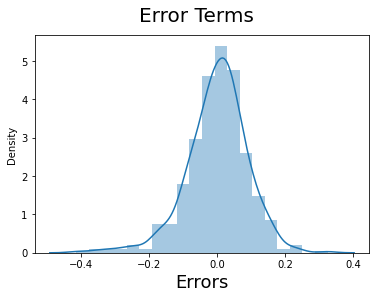

In [55]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Graph Shows Normal Distribution

### MultiColinearity

In [56]:
calVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
8,summer,1.56
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.16
6,Light_snowrain,1.08
1,holiday,1.04


#### Insight
VIF Value shows that there is no multicolinearity

## Check for Linearity

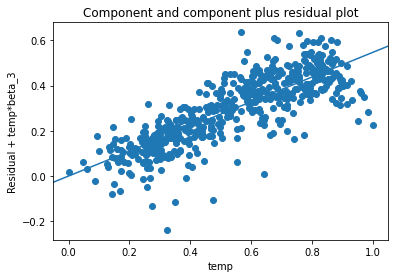

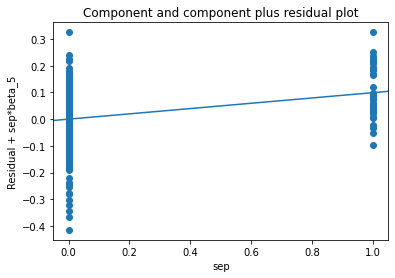

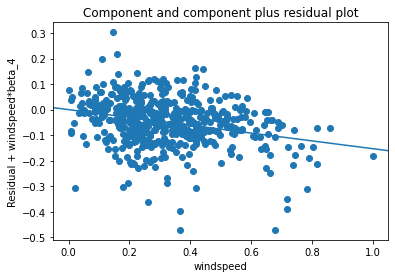

In [57]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

## Step 8: Prediction Using Final Model

In [58]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'temp_feel_like', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [59]:
df_test.head()

,year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [60]:
df_test.describe()

,year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Test Between X_test and y_test

In [61]:
y_test = df_test.pop('count')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            219 non-null    int64  
 1   holiday         219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   temp_feel_like  219 non-null    float64
 5   humidity        219 non-null    float64
 6   windspeed       219 non-null    float64
 7   aug             219 non-null    uint8  
 8   dec             219 non-null    uint8  
 9   feb             219 non-null    uint8  
 10  jan             219 non-null    uint8  
 11  july            219 non-null    uint8  
 12  june            219 non-null    uint8  
 13  mar             219 non-null    uint8  
 14  may             219 non-null    uint8  
 15  nov             219 non-null    uint8  
 16  oct             219 non-null    uint8  
 17  sep             219 non-null    ui

In [62]:
#Selecting the variables that were part of final model.
col1 = X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   year            219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   temp            219 non-null    float64
 4   windspeed       219 non-null    float64
 5   sep             219 non-null    uint8  
 6   sun             219 non-null    uint8  
 7   Light_snowrain  219 non-null    uint8  
 8   Misty           219 non-null    uint8  
 9   summer          219 non-null    uint8  
 10  winter          219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [63]:
# Making predictions using the final model (lr6)

y_pred = lr_6.predict(X_test_lm6)

In [64]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7958

### Step 9: Model Evaluation

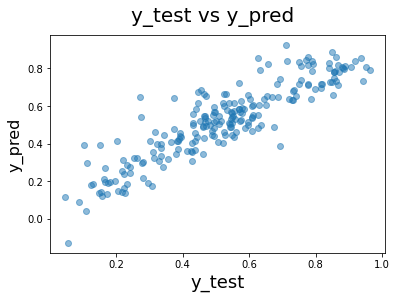

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [66]:
round(lr_6.params,4)

const             0.1350
year              0.2327
holiday          -0.1072
temp              0.5471
windspeed        -0.1531
sep               0.0992
sun              -0.0500
Light_snowrain   -0.2892
Misty            -0.0819
summer            0.0866
winter            0.1323
dtype: float64

In [67]:
r2_score(y_test, y_pred)

0.7958272128950747

In [68]:
# We already have the value of R^2 (calculated in above step)

r2=0.7958272128950747

In [69]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [70]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7860112135150303

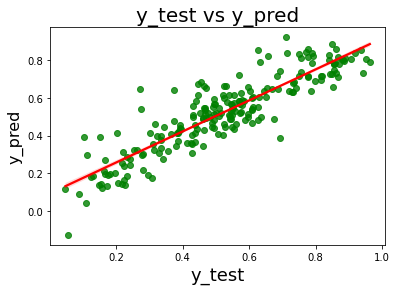

In [71]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x = y_test, y = y_pred, ci = 68, fit_reg = True, scatter_kws = {"color": "Green"}, line_kws = {"color": "red"})
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### As per above analysis, the comapany should focus on the following features:
- Company should plan to expand business during Spring and September.
- The bookings are less during holidays or on Light Snow or Rain, therefore same time can be considered for renovation/services or repair works

_'Conclusion: '_
Features to be considerd:
- holiday
- Sunday
- temp
- humidity
- windspeed
- Season
- months(January, July, September, November, December)
- weathersit( Light Snow, Mist + Cloudy)